# AMATH 242 ASSIGNMENT 2

## Danesh Morales

### Question 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import sparse

In [2]:

def PageRank(G, alpha):

    tolerance = 1e-8
    G2 = G.copy()
    R = G.shape[1]

    ## Transform adjacency matrix to probability matrix and add the d vector right away

    for i in range(R):

        col_i = G2.getcol(i)
        i_non_zeroes = col_i.count_nonzero()

        if i_non_zeroes == 0:
            G2[0:R, i] = 1/R
        else:
            G2[0:R, i] = col_i/i_non_zeroes

    e = np.ones(R)
    first_p = e/R ## Uniform distribution in p
    G3 = G.copy()
    G3[:, :] = (1 - alpha) / R
    M = alpha*G2 + G3
    n = 0
    repeat = True

    while repeat:

        n += 1
        newp = M.dot(first_p)

        repeat = False

        for i in range(R):
            if np.abs(newp[i]-first_p[i]) > tolerance:
                repeat = True
                break

        first_p = newp

        if not repeat:
            break

    return first_p, n

Qb (i)

In [6]:
G = sparse.dok_matrix((11, 11), dtype=np.float32)

G[1, 0] = 1
G[4, 0] = 1
G[3, 0] = 1
G[2, 0] = 1
G[0, 1] = 1
G[4, 1] = 1
G[3, 1] = 1
G[2, 1] = 1
G[5, 1] = 1
G[10, 1] = 1
G[1, 2] = 1
G[0, 2] = 1
G[4, 2] = 1
G[3, 2] = 1
G[4, 3] = 1
G[0, 3] = 1
G[1, 3] = 1
G[2, 3] = 1
G[0, 4] = 1
G[1, 4] = 1
G[2, 4] = 1
G[3, 4] = 1
G[1, 5] = 1
G[6, 5] = 1
G[7, 5] = 1
G[8, 5] = 1
G[9, 5] = 1
G[10, 5] = 1
G[5, 6] = 1
G[5, 7] = 1
G[5, 8] = 1
G[5, 9] = 1
G[5, 10] = 1
G[1, 10] = 1

Qb (ii)

In [8]:
p, iters = PageRank(G, alpha = 0.85)

p, iters

(array([0.09819909, 0.15501742, 0.09819909, 0.09819909, 0.09819909,
        0.21192825, 0.04365954, 0.04365954, 0.04365954, 0.04365954,
        0.06562034]),
 58)

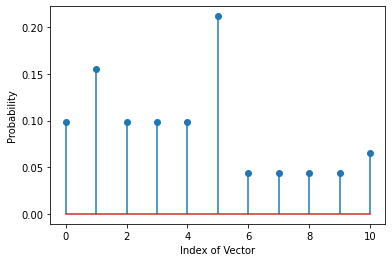

In [11]:
plt.stem(p)
plt.xlabel("Index of Vector")
plt.ylabel("Probability")
plt.show()

Q b (iii)

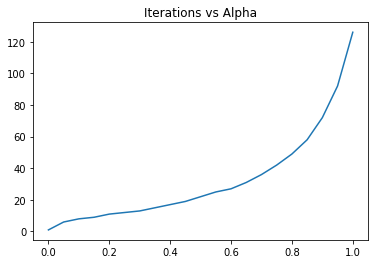

In [23]:
iterations = []

alpha = np.arange(0,1.05,0.05)

for x in alpha:
    p, iters = PageRank(G,x)
    iterations.append(iters)
    
plt.plot(alpha, iterations)
plt.title("Iterations vs Alpha")
plt.show()

The higher the alpha, the more iterations we need in order to converge, we can see that it grows exponentially

Qb (iv)

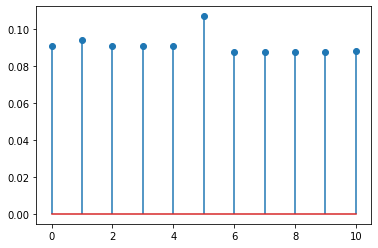

In [25]:
p, iters = PageRank(G, alpha = 0.05) ##Alpha = 0.05

plt.stem(p)
plt.show()


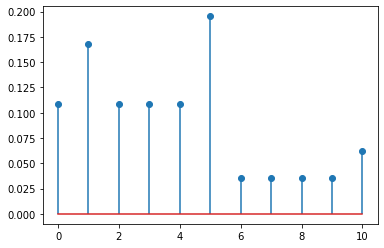

In [26]:
p, iters = PageRank(G, alpha = 0.95) ##Alpha = 0.95

plt.stem(p)
plt.show()

We can see that for small alpha, the probability for each node is very close to be uniformly distributed, whereas for high alpha, by inspection the probability is close to being proportional to the amount of links each node has. Still, for small alpha we can clearly see that the nodes that have the most links, have a higher probability, but just slightly.